In [63]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [64]:
iris = pd.read_csv('../iris.csv')

iris.drop('id', axis=1, inplace=True)

X = iris[['petal_len', 'petal_wd']]
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

## instantiate 
knn = KNeighborsClassifier(n_neighbors=5)

## fit 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [65]:
"""
In classification the most straightforward metric is accuracy. 
It calculates the proportion of data points whose predicted labels exactly match the observed labels.
"""

print((y_pred==y_test.values).sum())
print(y_test.size)

44
45


In [66]:
#The classifier made one mistake. Thus, the accuracy is 44/45
print((y_pred==y_test.values).sum()/y_test.size)
print(knn.score(X_test, y_test))

0.9777777777777777
0.9777777777777777


In [67]:
#Under the module sklearn.metrics, function accuracy_score(y_true, y_pred) does the same calculation

from sklearn.metrics import accuracy_score

accuracy_score(y_test.values, y_pred)

0.9777777777777777

In [68]:
accuracy_score(y_test, y_pred)

0.9777777777777777

In [69]:
"""
Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset.
Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

What is a confusion matrix ? 
It is a summary of the counts of correct and incorrect predictions , broken down by each class.

In classifying the iris, we can use confusion_matrix() under module sklearn.metrics
"""

from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


c:\Users\essam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


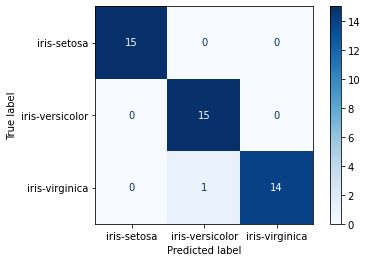

In [70]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#We can visualize the confusion matrix :
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);
plt.savefig("confusion matrix plot.png")

In [71]:
"""
The first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; 
while the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. 
This is consistent with our observation during exploratory data analysis, 
that is, there was some overlap between the two species on the scatter plot 
and it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.
"""

'\nThe first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; \nwhile the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. \nThis is consistent with our observation during exploratory data analysis, \nthat is, there was some overlap between the two species on the scatter plot \nand it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.\n'

In [72]:
"""
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.
"""

'\nA confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.\n'

In [73]:
"""
Previously we made train-test split before fitting the model so that we can report the model performance on the test data.
This is a simple kind of cross validation technique, also known as the holdout method.

However, the split is random, as a result, model performance can be sensitive to how the data is split. 
To overcome this, we introduce k-fold cross validation.

In k fold cross validation, the data is divided into k subsets.
Then the holdout method is repeated k times, such that 
each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model.
Then the accuracy is averaged over k trials to provide total effectiveness of the model. 
In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:
"""

from sklearn.model_selection import cross_val_score

# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)

# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

# print each cv score (accuracy) 
print(cv_scores)

# then average them
print(cv_scores.mean().round(3))

"""
We can not rely on one single train-test split, rather we report that the 5nn model has an accuracy of 95.33% based on a 5-fold cross validation.
"""

[0.97368421 0.94736842 0.94594595 1.        ]
0.967


'\nWe can not rely on one single train-test split, rather we report that the 5nn model has an accuracy of 95.33% based on a 5-fold cross validation.\n'

In [74]:
"""
As a general rule, 5-fold or 10-fold cross validation is preferred; 
but there is no formal rule. 
As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. 
As this difference decreases, the bias of the technique becomes smaller.

the explanation of the above text :

The text mentions that 5-fold or 10-fold cross-validation is commonly used, 
but there is no strict rule on the number of folds. 
These values are popular choices because they strike a balance between computational efficiency and reliable performance estimation.
One key point mentioned is that as the value of k (the number of neighbors in KNN) increases, 
the size difference between the training set and the subsets used for resampling (testing) becomes smaller. 
In other words, with a larger k, more neighbors are considered in the decision-making process, resulting in a more nuanced and potentially accurate prediction. 
This decrease in the size difference reduces the bias of the cross-validation technique, as the training set becomes more representative of the entire dataset.
"""

'\nAs a general rule, 5-fold or 10-fold cross validation is preferred; \nbut there is no formal rule. \nAs k gets larger, the difference in size between the training set and the resampling subsets gets smaller. \nAs this difference decreases, the bias of the technique becomes smaller.\n\nthe explanation of the above text :\n\nThe text mentions that 5-fold or 10-fold cross-validation is commonly used, \nbut there is no strict rule on the number of folds. \nThese values are popular choices because they strike a balance between computational efficiency and reliable performance estimation.\nOne key point mentioned is that as the value of k (the number of neighbors in KNN) increases, \nthe size difference between the training set and the subsets used for resampling (testing) becomes smaller. \nIn other words, with a larger k, more neighbors are considered in the decision-making process, resulting in a more nuanced and potentially accurate prediction. \nThis decrease in the size difference r

In [75]:
"""
What is the best k ?
Finding the optimal k is called tuning the hyperparameter.
A handy tool is grid search. 
In scikit-learn, we use GridSearchCV, 
which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, 
so that we can check which of our values for the tested hyperparameter performed the best.
"""

from sklearn.model_selection import GridSearchCV

# create new a knn model
knn2 = KNeighborsClassifier()

print(np.arange(2, 15+1))

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=4)

#fit model to data
knn_gscv.fit(X, y)

print(knn_gscv.best_params_)

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
{'n_neighbors': 5}


In [76]:
"""
We can see that 5 is the best value for n_neighbors. What is the accuracy of the model when k is 5?
"""

#What is the accuracy of the model when k is 5?
print(knn_gscv.best_score_.round(3))

0.967


In [77]:
#By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

print(cv_scores.mean().round(5))
print(knn_gscv.best_score_.round(5))

0.96675
0.96675


In [81]:
#Now we are ready to build the final model:

# create new a knn model
knn2 = KNeighborsClassifier()

# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 15+1)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=4)

#fit model to data
knn_gscv.fit(X, y)

print(knn_gscv.best_params_['n_neighbors'])

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, y))
print(knn_gscv.best_score_.round(3))

5
0.96
0.967


In [ ]:
"""
We can report that our final model, 4nn, has an accuracy of 96% in predicting the species of iris!

*** The techniques of k-fold cross validation and tuning parameters with grid search is applicable to both classification and regression problems.
"""